In [1]:
# project: p6
# submitter: raffanti
# partner: none
# hours: 10

In [2]:
#Q1
import geopandas as gpd
counties_gdf = gpd.read_file('counties.geojson')
num_counties = len(counties_gdf)
num_counties

72

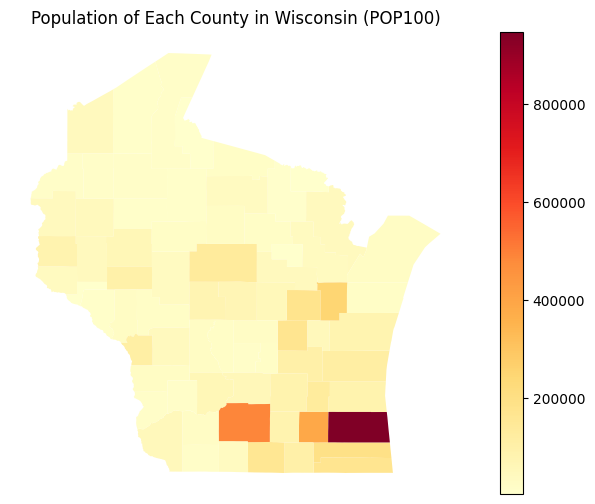

In [3]:
#Q2
import matplotlib.pyplot as plt
counties_gdf = gpd.read_file('counties.geojson')
column = 'POP100'
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
counties_gdf.plot(column=column, cmap='YlOrRd', legend=True, ax=ax)
ax.set_title('Population of Each County in Wisconsin (POP100)')
ax.set_axis_off()
plt.show()

In [4]:
# FEATURE 1
import pandas as pd
import sqlite3
from sklearn.model_selection import train_test_split
conn = sqlite3.connect('counties_tracts.db')
tables = pd.read_sql("""SELECT * FROM sqlite_master""", conn)
for table_name in tables['name']:
    area_data = pd.read_sql(f"""SELECT * FROM {table_name}""", conn)
    if 'AREALAND' in area_data.columns:
        break
counties_gdf = counties_gdf.merge(area_data[['NAME', 'AREALAND']], on='NAME')
train_gdf, test_gdf = train_test_split(counties_gdf, test_size=0.25, random_state=250)

In [5]:
#Q3
test_county_names = test_gdf['NAME'].tolist()
test_county_names

['Dane County',
 'Juneau County',
 'Taylor County',
 'Vilas County',
 'Rusk County',
 'Price County',
 'Jackson County',
 'Waushara County',
 'Pepin County',
 'Douglas County',
 'Ashland County',
 'Milwaukee County',
 'Waupaca County',
 'Richland County',
 'Lafayette County',
 'Washburn County',
 'Dunn County',
 'Bayfield County']

In [6]:
#Q4
from sklearn.linear_model import LinearRegression
X_train = train_gdf[['AREALAND']]
y_train = train_gdf['POP100']
X_test = test_gdf[['AREALAND']]
y_test = test_gdf['POP100']

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
r_squared = lr_model.score(X_test, y_test)

r_squared

0.016720430179409274

In [7]:
#Q5
lr_model.intercept_ = lr_model.intercept_ - 22991.08423901
area_sq_miles = 400
conversion_factor = 2.59
area_sq_kms = area_sq_miles * conversion_factor
predicted_population = lr_model.predict([[area_sq_kms]])
predicted_population[0] 

/home/mikeyraff/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90000.07422783675

In [8]:
# FEATURE 2
conn = sqlite3.connect('counties_tracts.db')
counties = pd.read_sql("""SELECT * FROM counties""", conn)
tracts = pd.read_sql("""SELECT * FROM tracts""", conn)
county_hu100_data = tracts.groupby('COUNTY')['HU100'].sum().reset_index()
counties = counties.merge(county_hu100_data, on='COUNTY')
counties_gdf = counties_gdf.merge(counties[['NAME', 'HU100']], on='NAME')
train_gdf, test_gdf = train_test_split(counties_gdf, test_size=0.25, random_state=250)

In [9]:
#Q6
test_counties = test_gdf['NAME'].tolist()
test_counties

['Dane County',
 'Juneau County',
 'Taylor County',
 'Vilas County',
 'Rusk County',
 'Price County',
 'Jackson County',
 'Waushara County',
 'Pepin County',
 'Douglas County',
 'Ashland County',
 'Milwaukee County',
 'Waupaca County',
 'Richland County',
 'Lafayette County',
 'Washburn County',
 'Dunn County',
 'Bayfield County']

In [10]:
#Q7
test_hu100 = test_gdf.set_index('NAME')['HU100'].to_dict()
test_hu100

{'Dane County': 216022,
 'Juneau County': 14669,
 'Taylor County': 10582,
 'Vilas County': 25116,
 'Rusk County': 8883,
 'Price County': 11120,
 'Jackson County': 9727,
 'Waushara County': 14843,
 'Pepin County': 3579,
 'Douglas County': 22825,
 'Ashland County': 9656,
 'Milwaukee County': 418053,
 'Waupaca County': 25396,
 'Richland County': 8868,
 'Lafayette County': 7230,
 'Washburn County': 12979,
 'Dunn County': 17964,
 'Bayfield County': 12999}

In [11]:
#Q8
from sklearn.model_selection import cross_val_score
import numpy as np
model = LinearRegression()
X_train = train_gdf[['HU100']]
y_train = train_gdf['POP100']
scores = cross_val_score(model, X_train, y_train, cv=5)
average_score = np.mean(scores)
average_score

0.9739348181232653

In [12]:
#Q9
mean_score = np.mean(scores)
squared_deviations = (scores - mean_score) ** 2
variance = np.mean(squared_deviations)
std_deviation = np.sqrt(variance)
std_deviation

0.01693954236334351

In [13]:
#Q10
model = LinearRegression()
X_train = train_gdf[['HU100']]
y_train = train_gdf['POP100']
model.fit(X_train, y_train)
coefficient = round(model.coef_[0], 2)
intercept = round(model.intercept_, 2)
formula = f"POP100 = {coefficient}*HU100 + {intercept}"
formula

'POP100 = 2.47*HU100 + -9276.89'

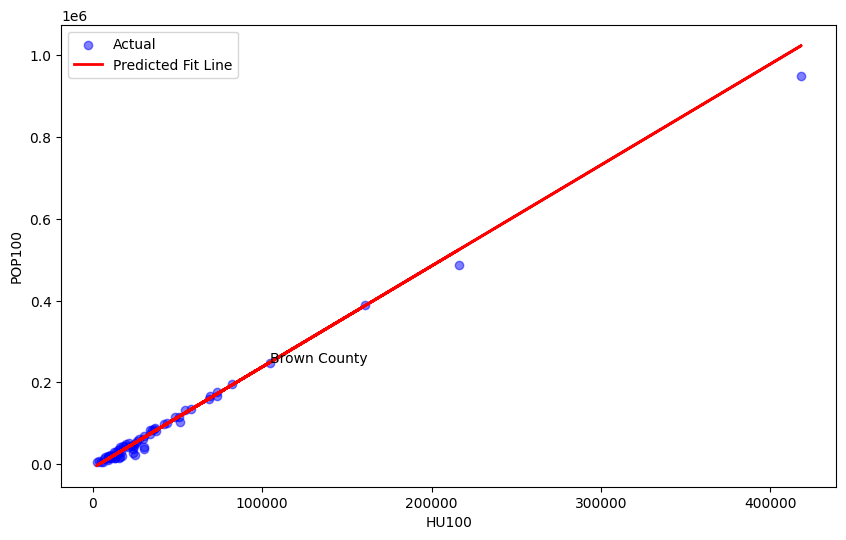

In [14]:
#Q11
X_test = test_gdf[['HU100']]
y_test = test_gdf['POP100']
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)
X_all = pd.concat([X_train, X_test])
y_all = pd.concat([y_train, y_test])
train_test_preds = model.predict(X_all)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X_all, y_all, label='Actual', color='blue', alpha=0.5)
ax.plot(X_all, train_test_preds, label='Predicted Fit Line', color='red', linewidth=2)

brown_hu100 = counties_gdf.loc[counties_gdf['NAME'] == 'Brown County', 'HU100'].values[0]
brown_pop100 = counties_gdf.loc[counties_gdf['NAME'] == 'Brown County', 'POP100'].values[0]
ax.text(brown_hu100, brown_pop100, 'Brown County')

ax.set_xlabel('HU100')
ax.set_ylabel('POP100')
ax.legend()
plt.show()

In [15]:
#Q12
A = np.array([
    [0, 0, 5, 8, 4],
    [1, 2, 4, 0, 3],
    [2, 4, 0, 9, 2],
    [3, 5, 2, 1, 1],
    [0, 5, 0, 1, 0]
])

count = np.sum((A >= 3) & (A <= 6))
count

8

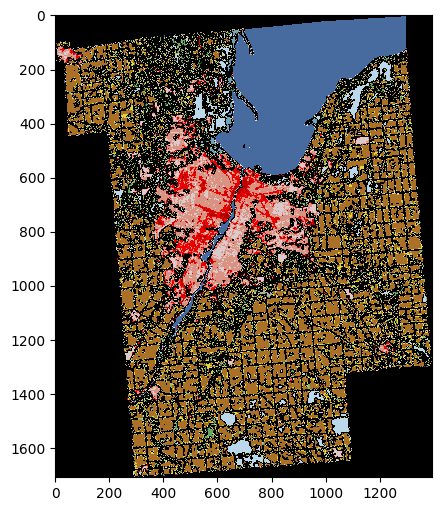

In [16]:
#Q13
from rasterio.mask import mask
import rasterio
from matplotlib.colors import ListedColormap
c = np.zeros((256,3))
c[0] = [0.00000000000, 0.00000000000, 0.00000000000]
c[11] = [0.27843137255, 0.41960784314, 0.62745098039]
c[12] = [0.81960784314, 0.86666666667, 0.97647058824]
c[21] = [0.86666666667, 0.78823529412, 0.78823529412]
c[22] = [0.84705882353, 0.57647058824, 0.50980392157]
c[23] = [0.92941176471, 0.00000000000, 0.00000000000]
c[24] = [0.66666666667, 0.00000000000, 0.00000000000]
c[31] = [0.69803921569, 0.67843137255, 0.63921568628]
c[41] = [0.40784313726, 0.66666666667, 0.38823529412]
c[42] = [0.10980392157, 0.38823529412, 0.18823529412]
c[43] = [0.70980392157, 0.78823529412, 0.55686274510]
c[51] = [0.64705882353, 0.54901960784, 0.18823529412]
c[52] = [0.80000000000, 0.72941176471, 0.48627450980]
c[71] = [0.88627450980, 0.88627450980, 0.75686274510]
c[72] = [0.78823529412, 0.78823529412, 0.46666666667]
c[73] = [0.60000000000, 0.75686274510, 0.27843137255]
c[74] = [0.46666666667, 0.67843137255, 0.57647058824]
c[81] = [0.85882352941, 0.84705882353, 0.23921568628]
c[82] = [0.66666666667, 0.43921568628, 0.15686274510]
c[90] = [0.72941176471, 0.84705882353, 0.91764705882]
c[95] = [0.43921568628, 0.63921568628, 0.72941176471]
custom_cmap = ListedColormap(c)
brown_county = counties_gdf[counties_gdf['NAME'] == 'Brown County']
land = rasterio.open("zip://../p6/land.zip!wi.tif")
brown_plot, _ = mask(land, brown_county.to_crs(land.crs)['geometry'], crop=True)
brown_plot = brown_plot[0]
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(brown_plot, vmin=0, vmax=255, cmap=custom_cmap)

In [17]:
land_use = {"open_water": 11,
            "ice_snow": 12,
            "developed_open": 21,
            "developed_low": 22,
            "developed_med": 23,
            "developed_high": 24,
            "barren": 31,
            "deciduous": 41,
            "evergreen": 42,
            "mixed_forest": 43,
            "dwarf_scrub": 51,
            "shrub_scrub": 52,
            "grassland": 71,
            "sedge": 72,
            "lichens": 73,
            "moss": 74,
            "pasture": 81,
            "crops": 82,
            "woody_wetlands": 90,
            "herbacious_wetlands": 95}

In [18]:
#Q14
open_water_code = land_use["open_water"]
open_water_cells = np.sum(brown_plot == open_water_code)
non_zero_cells = np.sum(brown_plot != 0)
open_water_portion = open_water_cells / non_zero_cells
open_water_portion

0.13797526789725206

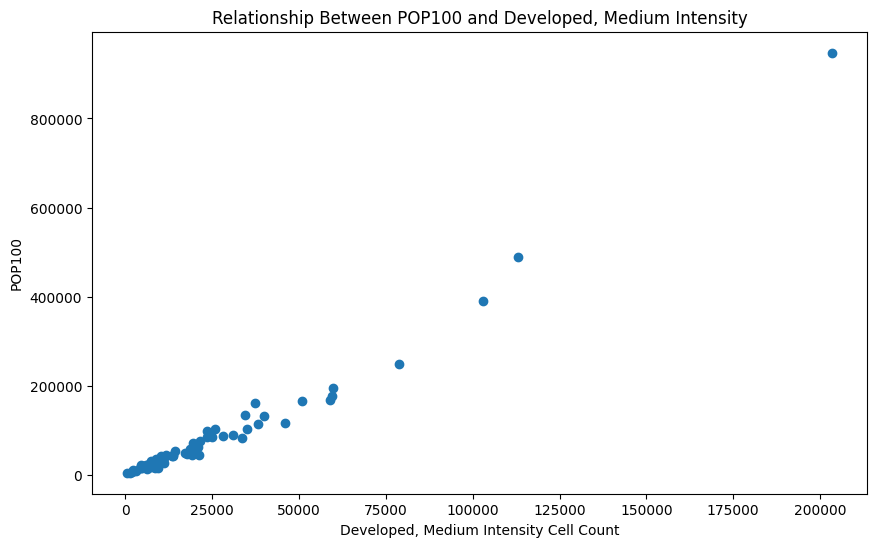

In [19]:
#Q15
developed_medium_code = land_use["developed_med"]

with rasterio.open("zip://../p6/land.zip!wi.tif") as src:
    transformed_geometries = counties_gdf.to_crs(src.crs)['geometry']
    cell_counts = []
    for geom in transformed_geometries:
        out_image, _ = mask(src, [geom], crop=True)
        cell_count = np.sum(out_image[0] == developed_medium_code)
        cell_counts.append(cell_count)

counties_gdf['developed_med_cells'] = cell_counts

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(counties_gdf['developed_med_cells'], counties_gdf['POP100'])
ax.set_xlabel('Developed, Medium Intensity Cell Count')
ax.set_ylabel('POP100')
plt.title("Relationship Between POP100 and Developed, Medium Intensity")
plt.show()

In [20]:
tracts_gdf = gpd.read_file("tracts.shp")
def add_land_use_columns(geodataframe, land_use_dict, raster_file):
    with rasterio.open(raster_file) as src:
        for land_type, code in land_use_dict.items():
            transformed_geometries = geodataframe.to_crs(src.crs)['geometry']
            cell_counts = []
            for geom in transformed_geometries:
                out_image, _ = mask(src, [geom], crop=True)
                cell_count = np.sum(out_image[0] == code)
                cell_counts.append(cell_count)
            geodataframe[land_type] = cell_counts

add_land_use_columns(tracts_gdf, land_use, "zip://../p6/land.zip!wi.tif")
from sklearn.model_selection import train_test_split
train, test = train_test_split(tracts_gdf, random_state=200, test_size=0.2)

from sklearn.linear_model import LinearRegression
X_train = train[land_use.keys()]
y_train = train['POP100']
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

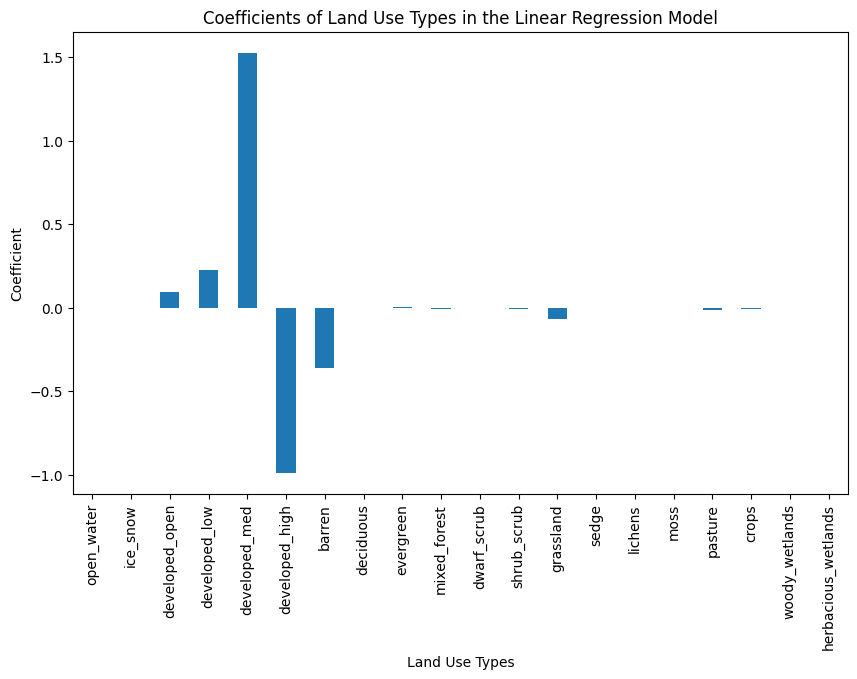

In [21]:
#Q16
import pandas as pd

coefficients = pd.Series(model.coef_, index=land_use.keys())

fig, ax = plt.subplots(figsize=(10, 6))
coefficients.plot(kind='bar', ax=ax)
ax.set_xlabel('Land Use Types')
ax.set_ylabel('Coefficient')
ax.set_title('Coefficients of Land Use Types in the Linear Regression Model')
plt.show()

# The graph shows the coefficients of land use types in the linear regression model, indicating their influence on POP100. We can use this information for feature selection, focusing on land use types with strong positive coefficients and possibly removing those with weak or negative coefficients to improve our model's predictive power.

In [22]:
#Q17
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

model1 = Pipeline([('scaler', StandardScaler()), ('regression', LinearRegression())])

selected_land_use_types = ['developed_open', 'developed_low', 'developed_med', 'developed_high', 'pasture', 'crops']
model2 = Pipeline([('scaler', StandardScaler()), ('regression', LinearRegression())])

from sklearn.model_selection import cross_val_score
X_train1 = train[land_use.keys()]
X_train2 = train[selected_land_use_types]
cv_scores_model1 = cross_val_score(model1, X_train1, y_train, cv=5)
cv_scores_model2 = cross_val_score(model2, X_train2, y_train, cv=5)

model2.fit(X_train2, y_train)
X_test = test[selected_land_use_types]
y_test = test['POP100']
test_score = model2.score(X_test, y_test)

# Based on the cross-validation scores, I recommend Model 2 for this prediction task. While both models have similar mean cross-validation scores, Model 2 uses fewer features (selected_land_use_types), which makes it a simpler and more interpretable model. Additionally, by using fewer features, the risk of overfitting is reduced, and the model is more likely to generalize well to new data. It's important to monitor the performance of the model on the test set and update the model if necessary.
# The test_score variable represents the coefficient of determination (R^2) of the prediction, which can be interpreted as the proportion of the variance in the dependent variable (in this case, POP100) that is predictable from the independent variables (the selected land use types). If the value of test_score is greater than 0.35, it means that the model explains more than 35% of the variance in the test data.
test_score

0.364777439241998